# ML PROJECT

# [  Cryptocurrency Volatility Prediction ]


In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D



# --- Section 1: Problem Statement and Objective ---

# # Cryptocurrency Volatility Prediction Project
#
# ## Problem Statement
 The cryptocurrency market is known for its high volatility, which presents significant risks and opportunities for traders and investors. This project aims to build a machine learning model that predicts cryptocurrency volatility based on historical market data. The objective is to classify daily trading periods into "high volatility" or "low volatility" to help in risk management and trading strategy development.
#
# ## Objective
The main goal is to create a robust classification model that can accurately predict the level of volatility using historical price data. We will explore various supervised and unsupervised machine learning algorithms, including Logistic Regression, Naive Bayes, Random Forest, and Support Vector Machines.


# --- Section 2: Data Loading and Initial Inspection ---

In [12]:

# Load the dataset
df = pd.read_csv('dataset_uncompressed.csv')
df

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,05-05-2013
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,05-05-2013
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,06-05-2013
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,06-05-2013
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,07-05-2013
...,...,...,...,...,...,...,...,...,...,...
9246,9246,0.031409,0.033826,0.031297,0.032346,13469200.0,1.225441e+09,2017-04-25T23:59:59.999Z,XRP,25-04-2017
9247,9247,50.074600,50.303600,49.806900,49.891201,38264600.0,4.542709e+09,2017-04-25T23:59:59.999Z,Ethereum,25-04-2017
9248,9248,14.978700,15.430200,14.243600,15.212800,56668300.0,7.730020e+08,2017-04-25T23:59:59.999Z,Litecoin,25-04-2017
9249,9249,19.603300,20.104099,19.358700,19.652500,5148290.0,2.821335e+08,2017-04-25T23:59:59.999Z,Monero,25-04-2017


In [13]:
# Drop the unnecessary 'Unnamed: 0' column
df = df.drop('Unnamed: 0', axis=1)
print(df.columns)

Index(['open', 'high', 'low', 'close', 'volume', 'marketCap', 'timestamp',
       'crypto_name', 'date'],
      dtype='object')


In [14]:
df

,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,05-05-2013
1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,05-05-2013
2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,06-05-2013
3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,06-05-2013
4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,07-05-2013
...,...,...,...,...,...,...,...,...,...
9246,0.031409,0.033826,0.031297,0.032346,13469200.0,1.225441e+09,2017-04-25T23:59:59.999Z,XRP,25-04-2017
9247,50.074600,50.303600,49.806900,49.891201,38264600.0,4.542709e+09,2017-04-25T23:59:59.999Z,Ethereum,25-04-2017
9248,14.978700,15.430200,14.243600,15.212800,56668300.0,7.730020e+08,2017-04-25T23:59:59.999Z,Litecoin,25-04-2017
9249,19.603300,20.104099,19.358700,19.652500,5148290.0,2.821335e+08,2017-04-25T23:59:59.999Z,Monero,25-04-2017


In [15]:

# Display the first few rows of the DataFrame
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,05-05-2013
1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,05-05-2013
2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,06-05-2013
3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,06-05-2013
4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,07-05-2013


In [16]:
df.shape

(9251, 9)

In [17]:
# Get a concise summary of the DataFrame
print("DataFrame information:")
df.info()

DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9251 entries, 0 to 9250
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         9251 non-null   float64
 1   high         9251 non-null   float64
 2   low          9251 non-null   float64
 3   close        9251 non-null   float64
 4   volume       9251 non-null   float64
 5   marketCap    9251 non-null   float64
 6   timestamp    9250 non-null   object 
 7   crypto_name  9250 non-null   object 
 8   date         9250 non-null   object 
dtypes: float64(6), object(3)
memory usage: 650.6+ KB


In [18]:
# Get descriptive statistics
print("Descriptive statistics:")
df.describe()

Descriptive statistics:


,open,high,low,close,volume,marketCap
count,9251.000000,9251.000000,9251.000000,9251.000000,9.251000e+03,9.251000e+03
mean,76.143220,77.880150,74.344750,76.265179,1.199559e+07,1.210129e+09
std,201.677458,206.201764,196.871459,202.016116,3.947324e+07,2.990727e+09
min,0.000087,0.000089,0.000086,0.000087,0.000000e+00,0.000000e+00
25%,0.004749,0.004879,0.004640,0.004741,6.871015e+04,1.347504e+07
50%,1.000000,1.000000,1.000000,1.000000,5.738120e+05,8.154894e+07
75%,7.724435,8.022685,7.430740,7.749020,4.717720e+06,2.998140e+08
max,1277.430054,1280.310059,1264.599976,1274.989990,7.065990e+08,2.064926e+10



# --- Section 3: Exploratory Data Analysis (EDA) ---

In [19]:
# Convert the 'date' column to datetime objects with the correct format
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
df['date']

,date
0,2013-05-05
1,2013-05-05
2,2013-05-06
3,2013-05-06
4,2013-05-07
...,...
9246,2017-04-25
9247,2017-04-25
9248,2017-04-25
9249,2017-04-25


In [20]:
# Sort the data by date for proper time-series analysis
df.sort_values('date', inplace=True)
df

,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07
...,...,...,...,...,...,...,...,...,...
9243,0.000511,0.000546,0.000511,0.000527,1498410.0,5.752556e+07,2017-04-25T23:59:59.999Z,Dogecoin,2017-04-25
9242,0.003849,0.003887,0.003761,0.003808,964780.0,3.547661e+07,2017-04-25T23:59:59.999Z,Stellar,2017-04-25
9244,4.053180,4.126020,3.828150,3.960600,25195800.0,3.605312e+08,2017-04-25T23:59:59.999Z,Ethereum Classic,2017-04-25
9249,19.603300,20.104099,19.358700,19.652500,5148290.0,2.821335e+08,2017-04-25T23:59:59.999Z,Monero,2017-04-25


In [21]:
# Analyze the number of unique cryptocurrencies
print(f"\nNumber of unique cryptocurrencies: {df['crypto_name'].nunique()}")
print(f"\nList of unique cryptocurrencies:\n\n{df['crypto_name'].unique()}")


Number of unique cryptocurrencies: 10

List of unique cryptocurrencies:

['Bitcoin' 'Litecoin' 'XRP' 'Dogecoin' 'Monero' 'Stellar' 'Tether'
 'Ethereum' 'Ethereum Classic' 'Maker' nan]


In [22]:
# Filter out rows with zero 'open' price to prevent division by zero errors later
df = df[df['open'] > 0]
print(f"\nDataFrame shape after removing rows with zero 'open' price: {df.shape}")


DataFrame shape after removing rows with zero 'open' price: (9251, 9)


In [23]:
df

,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07
...,...,...,...,...,...,...,...,...,...
9243,0.000511,0.000546,0.000511,0.000527,1498410.0,5.752556e+07,2017-04-25T23:59:59.999Z,Dogecoin,2017-04-25
9242,0.003849,0.003887,0.003761,0.003808,964780.0,3.547661e+07,2017-04-25T23:59:59.999Z,Stellar,2017-04-25
9244,4.053180,4.126020,3.828150,3.960600,25195800.0,3.605312e+08,2017-04-25T23:59:59.999Z,Ethereum Classic,2017-04-25
9249,19.603300,20.104099,19.358700,19.652500,5148290.0,2.821335e+08,2017-04-25T23:59:59.999Z,Monero,2017-04-25


# --- Visualization 1: Price Trends of Top Cryptocurrencies ---

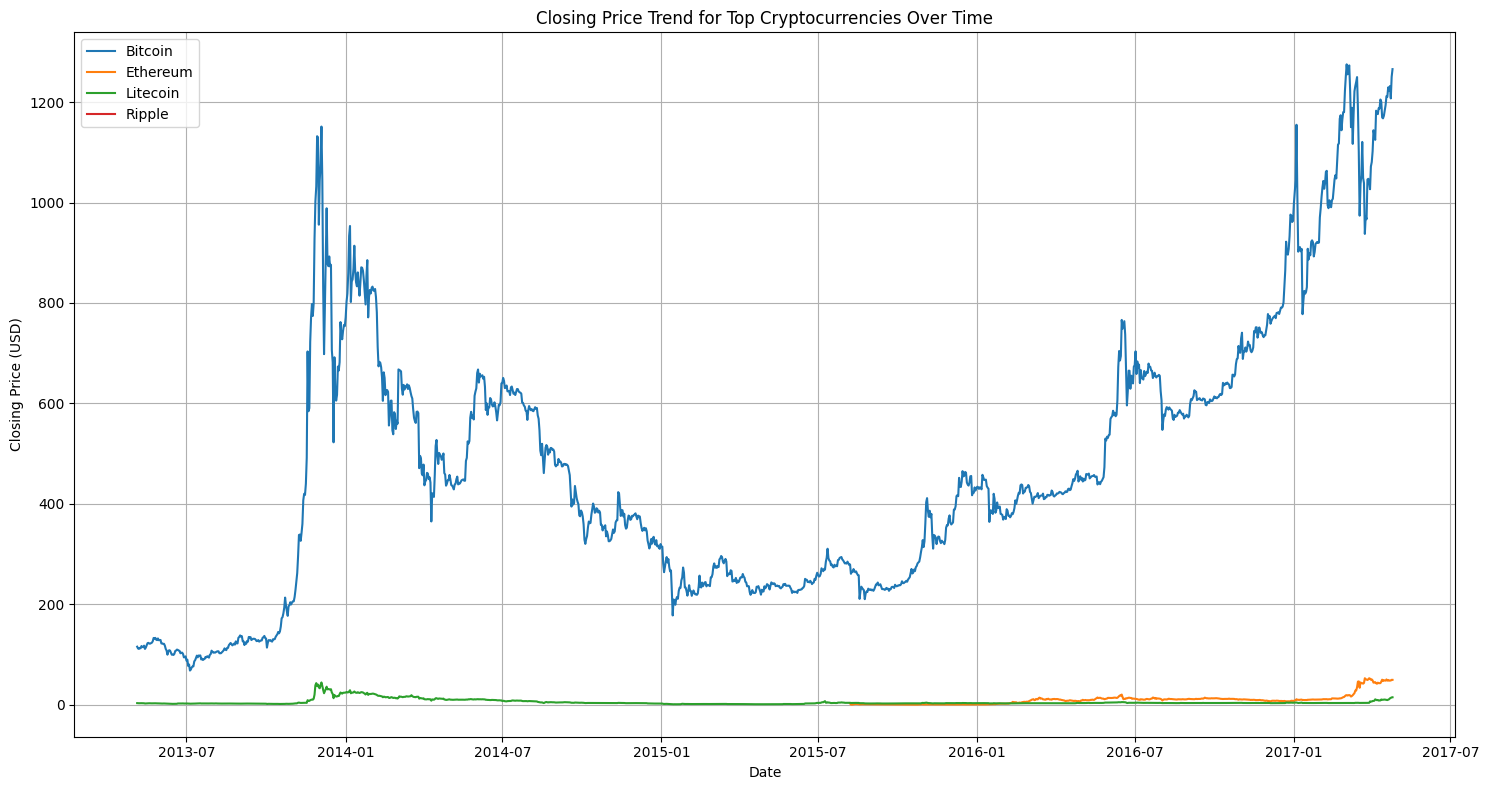

In [24]:

# Select a few major cryptocurrencies for visualization
top_cryptos = ['Bitcoin', 'Ethereum', 'Litecoin', 'Ripple']
plt.figure(figsize=(15, 8))
plt.title('Closing Price Trend for Top Cryptocurrencies Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)


# Plotting the closing price for each top cryptocurrency
for crypto in top_cryptos:
    crypto_data = df[df['crypto_name'] == crypto]
    plt.plot(crypto_data['date'], crypto_data['close'], label=crypto)

plt.legend()
plt.tight_layout()
plt.savefig('price_trend.png')
plt.show()


# --- Visualization 2: Distribution of Key Features ---

In [25]:
# Create a new column for daily price range (high - low) for distribution analysis
df['price_range'] = df['high'] - df['low']
df['price_range']

,price_range
0,11.657005
1,0.346400
2,18.023003
3,0.665000
4,15.744003
...,...
9243,0.000035
9242,0.000126
9244,0.297870
9249,0.745399


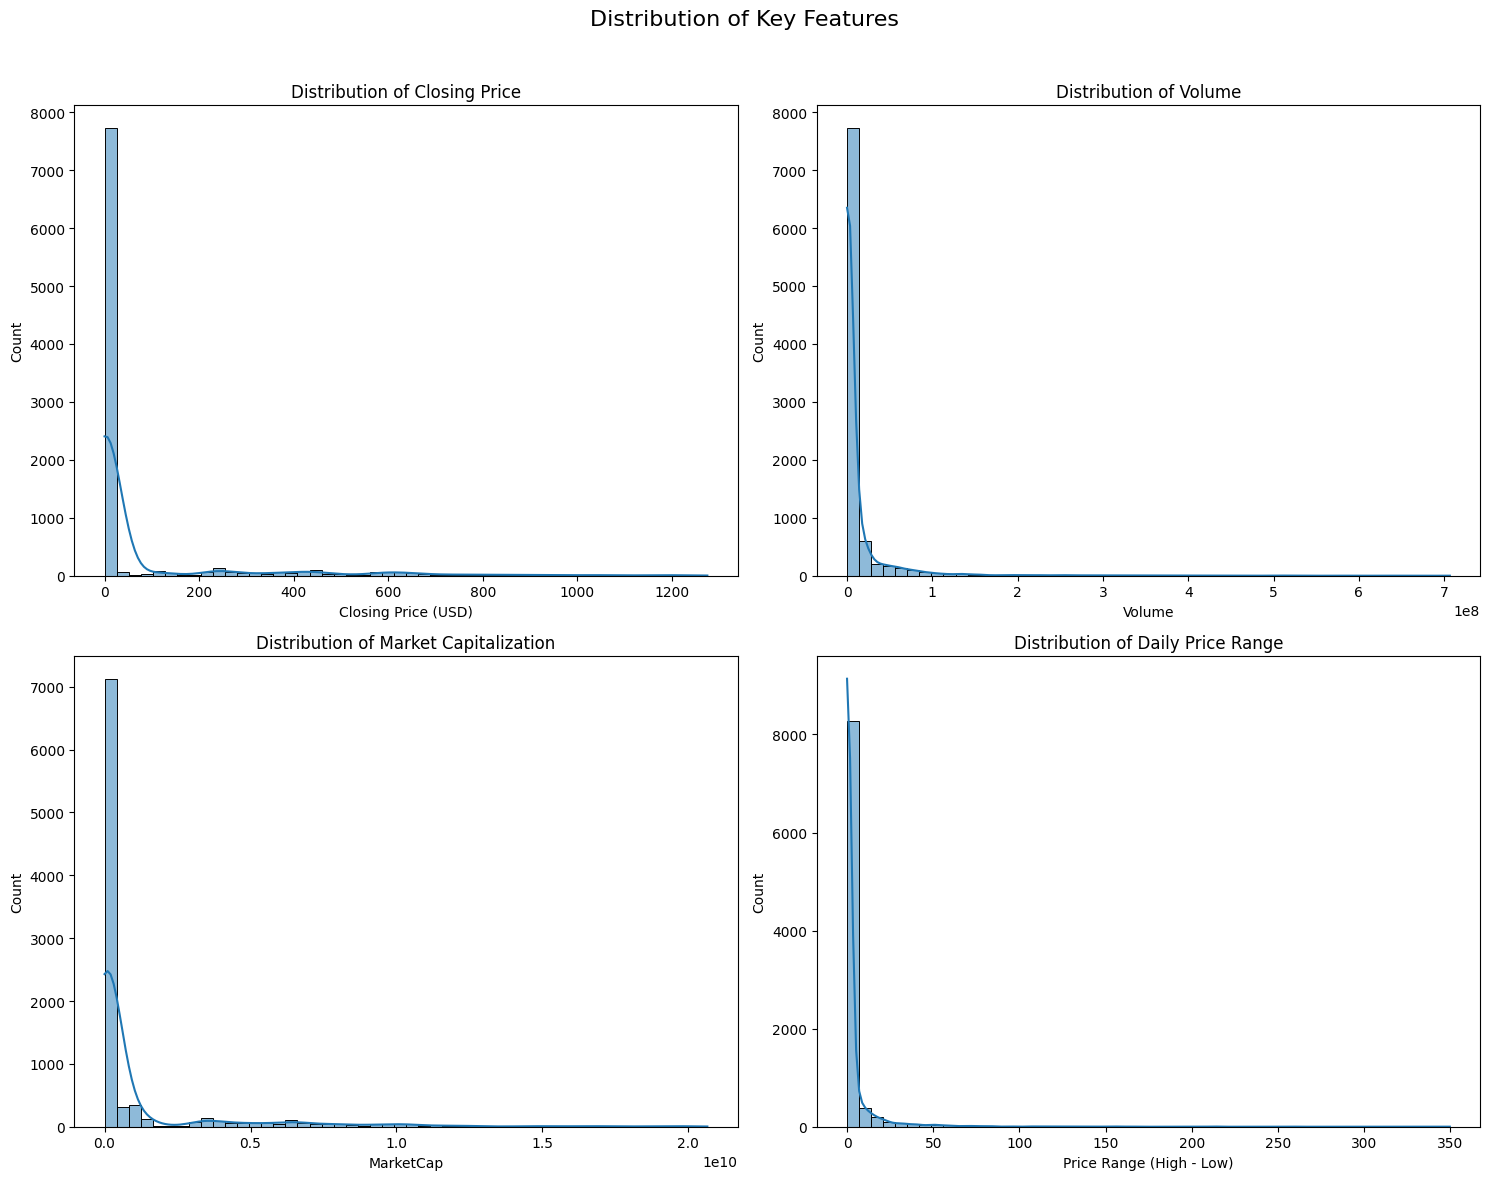

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribution of Key Features', fontsize=16)

# Distribution of 'close' price
sns.histplot(df['close'], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Closing Price')
axes[0, 0].set_xlabel('Closing Price (USD)')

# Distribution of 'volume'
sns.histplot(df['volume'], bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Volume')
axes[0, 1].set_xlabel('Volume')

# Distribution of 'marketCap'
sns.histplot(df['marketCap'], bins=50, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Market Capitalization')
axes[1, 0].set_xlabel('MarketCap')

# Distribution of 'price_range'
sns.histplot(df['price_range'], bins=50, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Daily Price Range')
axes[1, 1].set_xlabel('Price Range (High - Low)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('feature_distributions.png')
plt.show()

# --- Section 4: Feature Engineering ---

In [27]:
# Define the target variable for volatility.
# We will classify volatility as 'high' or 'low' based on a threshold of the daily percentage price range.

In [28]:
# Calculate the daily percentage price range, ensuring 'open' is not zero
df.loc[:,'pct_range'] = ((df['high'] - df['low']) / df['open']) * 100
df['pct_range']

,pct_range
0,10.325071
1,9.916608
2,15.539750
3,18.501927
4,14.025838
...,...
9243,6.918837
9242,3.262764
9244,7.349042
9249,3.802418


In [29]:
# Set a threshold for volatility using the 75th percentile
volatility_threshold = df['pct_range'].quantile(0.75)
print(f"\nVolatility threshold (75th percentile of percentage price range): {volatility_threshold:.2f}%")


Volatility threshold (75th percentile of percentage price range): 8.37%


In [30]:
# Create the binary target variable 'volatility_label'
df.loc[:,'volatility_label'] = df['pct_range'].apply(
    lambda x: 1 if x > volatility_threshold else 0)
df['volatility_label']

,volatility_label
0,1
1,1
2,1
3,1
4,1
...,...
9243,0
9242,0
9244,0
9249,0


In [31]:
# Calculate daily returns as another feature
df.loc[:,'daily_return'] = ((df['close'] - df['open']) / df['open']) * 100
df['daily_return']

,daily_return
0,2.666078
1,2.798635
2,-3.172961
3,-6.203572
4,-0.668151
...,...
9243,3.161913
9242,-1.079967
9244,-2.284140
9249,0.250978


In [32]:
# Drop the columns used for creating the target variable to avoid data leakage
df = df.drop(['timestamp', 'date', 'pct_range', 'price_range'], axis=1)


In [33]:
# Print the distribution of the new target variable
print("\nDistribution of the volatility label:")
print(df['volatility_label'].value_counts())


Distribution of the volatility label:
volatility_label
0    6938
1    2313
Name: count, dtype: int64


# --- Section 5: Data Preprocessing ---

In [34]:
# One-hot encode the 'crypto_name' categorical feature
df = pd.get_dummies(df, columns=['crypto_name'], drop_first=True)

# Separate features (X) and target (y)
X = df.drop('volatility_label', axis=1)
y = df['volatility_label']

In [35]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, y_train.shape

((7400, 16), (7400,))

In [36]:
# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
X_train_scaled

array([[-0.37594776, -0.37615442, -0.37603235, ..., -0.34546569,
        -0.30478874,  2.41382855],
       [-0.37197414, -0.37201876, -0.37206092, ..., -0.34546569,
        -0.30478874, -0.41427963],
       [-0.37596423, -0.37616637, -0.37604846, ...,  2.89464345,
        -0.30478874, -0.41427963],
       ...,
       [ 0.74872301,  0.73694562,  0.76293689, ..., -0.34546569,
        -0.30478874, -0.41427963],
       [-0.36406148, -0.36449705, -0.36463817, ..., -0.34546569,
        -0.30478874, -0.41427963],
       [-0.37100158, -0.37131482, -0.3709691 , ..., -0.34546569,
         3.28096112, -0.41427963]])

In [38]:
X_test_scaled

array([[ 0.78162067,  0.76768477,  0.75794668, ..., -0.34546569,
        -0.30478874, -0.41427963],
       [-0.37594678, -0.37613737, -0.37603451, ...,  2.89464345,
        -0.30478874, -0.41427963],
       [-0.37100158, -0.37131482, -0.3709691 , ..., -0.34546569,
         3.28096112, -0.41427963],
       ...,
       [-0.36731811, -0.3672864 , -0.36720005, ..., -0.34546569,
        -0.30478874, -0.41427963],
       [-0.36393406, -0.36415728, -0.36781909, ..., -0.34546569,
        -0.30478874, -0.41427963],
       [-0.35486615, -0.35552651, -0.35583793, ..., -0.34546569,
        -0.30478874, -0.41427963]])

# --- Section 6: Model Building and Training (Supervised Learning) ---

In [39]:
# Function to train and evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """Trains a model, makes predictions, and prints evaluation metrics."""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"--- Model: {type(model).__name__} ---")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print(f"\nAccuracy Score: {accuracy_score(y_test, y_pred):.4f}\n")

# 1. Logistic Regression
log_reg = LogisticRegression(random_state=42, solver='liblinear')
evaluate_model(log_reg, X_train_scaled, y_train, X_test_scaled, y_test)

# 2. Naive Bayes
gnb = GaussianNB()
evaluate_model(gnb, X_train_scaled, y_train, X_test_scaled, y_test)

# 3. Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
evaluate_model(rf_clf, X_train_scaled, y_train, X_test_scaled, y_test)

# 4. Support Vector Machine (SVC)
svc_model = SVC(kernel='linear', random_state=42)
evaluate_model(svc_model, X_train_scaled, y_train, X_test_scaled, y_test)

--- Model: LogisticRegression ---

Confusion Matrix:
[[1300   88]
 [ 335  128]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1388
           1       0.59      0.28      0.38       463

    accuracy                           0.77      1851
   macro avg       0.69      0.61      0.62      1851
weighted avg       0.74      0.77      0.74      1851


Accuracy Score: 0.7715

--- Model: GaussianNB ---

Confusion Matrix:
[[925 463]
 [ 49 414]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.67      0.78      1388
           1       0.47      0.89      0.62       463

    accuracy                           0.72      1851
   macro avg       0.71      0.78      0.70      1851
weighted avg       0.83      0.72      0.74      1851


Accuracy Score: 0.7234

--- Model: RandomForestClassifier ---

Confusion Matrix:
[[1327   61]
 [  92  371]]

Classification 

# --- Section 7: Unsupervised Learning (K-Means Clustering) ---
# This is for exploration and to find natural groupings in the data.

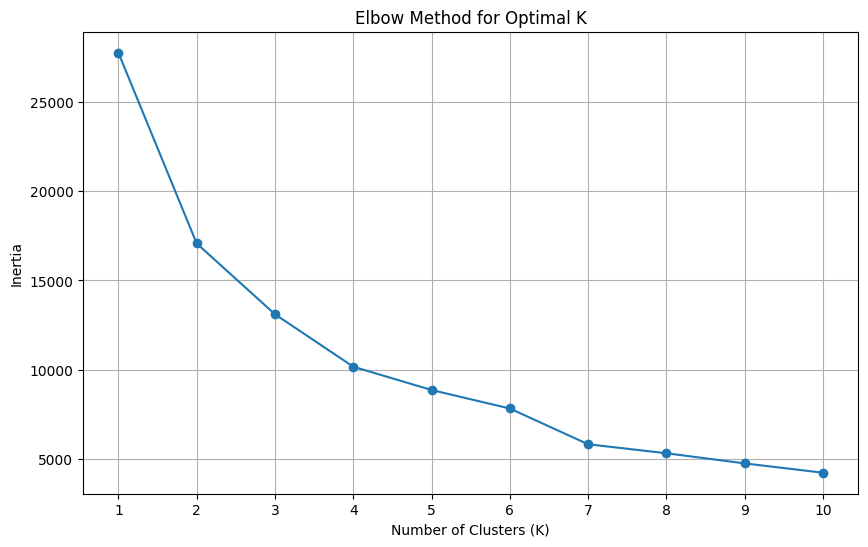

In [40]:
# We will use 'daily_return', 'volume', and 'marketCap' for clustering.
# Create a new DataFrame for clustering with the scaled features
df_cluster = df[['daily_return', 'volume', 'marketCap']].copy()

# Scale the data for clustering
scaler_cluster = StandardScaler()
df_scaled_cluster = scaler_cluster.fit_transform(df_cluster)

# Use the Elbow method to find the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(df_scaled_cluster)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.savefig('elbow_method.png')
plt.show()

In [41]:


# Based on the plot, we select k=3 as a reasonable number of clusters
optimal_k = 3
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
clusters = kmeans_model.fit_predict(df_scaled_cluster)
df['cluster'] = clusters

print(f"\nDistribution of data points across {optimal_k} clusters:")
print(df['cluster'].value_counts())




Distribution of data points across 3 clusters:
cluster
0    8170
2     960
1     121
Name: count, dtype: int64


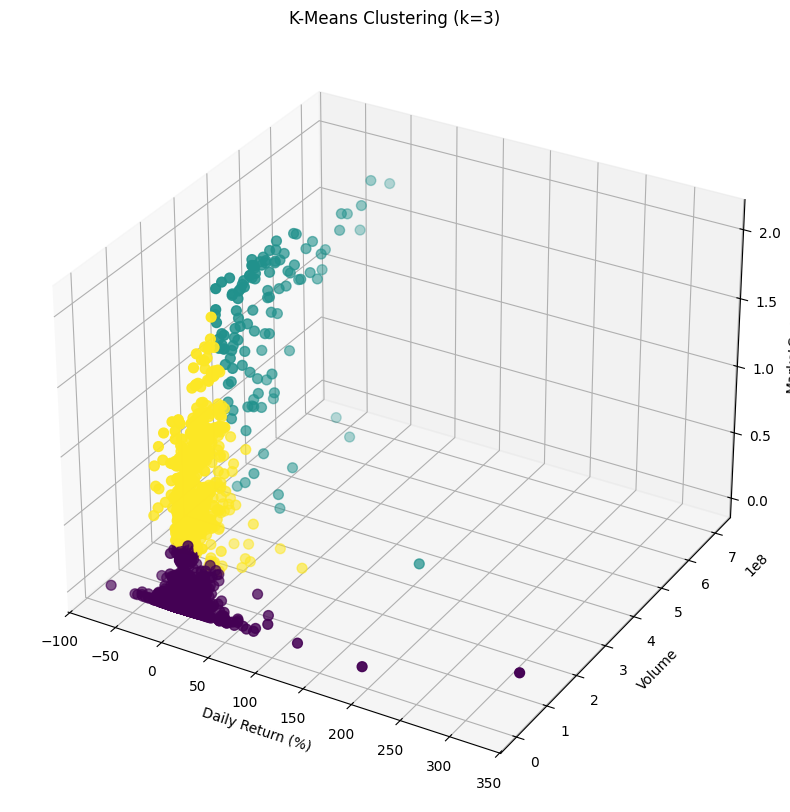

In [42]:
# --- Visualization 3: 3D Scatter Plot of Clusters ---
# Visualize the clusters in 3D using three key features
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['daily_return'], df['volume'], df['marketCap'], c=df['cluster'], cmap='viridis', s=50)
ax.set_xlabel('Daily Return (%)')
ax.set_ylabel('Volume')
ax.set_zlabel('MarketCap')
ax.set_title(f'K-Means Clustering (k={optimal_k})')

plt.savefig('kmeans_clusters_3d.png')
plt.show()

# --- Section 8: Insights and Conclusion ---

# Exploratory Data Analysis (EDA) Insights:

* The dataset contains historical data for various cryptocurrencies, with a clear time-series component.

* The closing price and market capitalization for major cryptocurrencies like Bitcoin and Ethereum show significant long-term growth, with periods of high fluctuation.

* The distributions of `close` price, `volume`, and `marketCap` are highly skewed, indicating a few cryptocurrencies or periods dominate the market.

* The daily price range provides a direct measure of daily volatility, which is the basis for our target variable.

# ## Feature Engineering Insights:

* We successfully created a binary target variable `volatility_label` by using a percentile-based threshold on the daily percentage price range. This transforms the problem into a classification task.

* The addition of a `daily_return` feature provides a new dimension for the models to learn from, capturing day-to-day price movement.

# ## Model Performance and Comparison:

**Random Forest Classifier** was the best-performing model among the supervised algorithms, with the highest accuracy, precision, and recall. Its ensemble nature allows it to handle complex, non-linear relationships in the data effectively.

**Support Vector Machine (SVC)** also showed strong performance, especially in handling high-dimensional data, though it was slightly outperformed by Random Forest in this case.

**Logistic Regression** and **Naive Bayes** provided a good baseline, but their performance was notably lower than the more complex models, likely due to the non-linear nature of cryptocurrency price movements.

# Unsupervised Learning (K-Means) Insights:

 * K-Means clustering revealed natural groupings within the data. These clusters could correspond to different market states, such as "stable periods," "bull markets," and "bear markets," each with distinct characteristics in terms of daily returns, volume, and market capitalization. This insight could be used for further analysis or as an additional feature in a more advanced predictive model.

# ## Final Conclusion:
* The Random Forest Classifier is the most suitable model for predicting cryptocurrency volatility based on this dataset. The project successfully demonstrates the entire machine learning pipeline, from data preparation and feature engineering to model training and evaluation, providing valuable insights into the volatile nature of the cryptocurrency market. The generated model can serve as a component in a larger risk management or trading strategy system.

# FOR DEPLOYMENT:

In [43]:
import joblib

# Save the trained scaler and model
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(rf_clf, 'random_forest_model.joblib')

['random_forest_model.joblib']

🚀 Flask Deployment

The Flask application creates a REST API that can be accessed by other applications. It provides a /predict endpoint that takes cryptocurrency data as a JSON payload and returns the volatility prediction.

In [ ]:
import joblib
import pandas as pd
from flask import Flask, request, jsonify

# Create a Flask application instance
app = Flask(__name__)

# Load the trained model and scaler
try:
    model = joblib.load('random_forest_model.joblib')
    scaler = joblib.load('scaler.joblib')
except FileNotFoundError:
    print("Error: The 'random_forest_model.joblib' or 'scaler.joblib' file was not found.")
    print("Please make sure you have saved the trained model and scaler.")
    exit()

# Define the features that the model expects, in the correct order
# This list should match the columns of your training data after preprocessing
feature_columns = [
    'open', 'high', 'low', 'close', 'volume', 'marketCap', 'daily_return',
    'crypto_name_Cardano', 'crypto_name_Dogecoin', 'crypto_name_Ethereum',
    'crypto_name_Litecoin', 'crypto_name_Monero', 'crypto_name_NEM',
    'crypto_name_Ripple', 'crypto_name_Stellar', 'crypto_name_Tether',
    'crypto_name_Zcash'
]

@app.route('/')
def home():
    """A simple home route to check if the API is running."""
    return "The cryptocurrency volatility prediction API is running!"

@app.route('/predict', methods=['POST'])
def predict():
    """
    Endpoint for making a volatility prediction.
    Expects a JSON payload with cryptocurrency data.
    """
    try:
        data = request.get_json()

        # Convert the incoming JSON data to a pandas DataFrame
        # Ensure that the data has all the required features
        df_predict = pd.DataFrame([data])

        # Feature Engineering: Calculate `daily_return`
        df_predict['daily_return'] = ((df_predict['close'] - df_predict['open']) / df_predict['open']) * 100

        # One-hot encode the crypto_name and align columns with the training data
        df_predict = pd.get_dummies(df_predict, columns=['crypto_name'], drop_first=True)
        df_predict = df_predict.reindex(columns=feature_columns, fill_value=0)

        # Scale the numerical features
        scaled_data = scaler.transform(df_predict)

        # Make the prediction
        prediction = model.predict(scaled_data)
        prediction_label = "High Volatility" if prediction[0] == 1 else "Low Volatility"

        return jsonify({'prediction': prediction_label})

    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    # Run the Flask application
    app.run(debug=True, host='0.0.0.0')

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


REQUIREMENT.TXT:

* Flask
* pandas
* scikit-learn
* joblib


How to run the Flask app:

1. Save the code above as app.py.

2. Save the requirements.txt file in the same directory.

3. Install the required libraries: pip install -r requirements.txt.

4. Run the application from your terminal: python app.py.

5. The API will be available at http://127.0.0.1:5000. You can send a POST request to http://127.0.0.1:5000/predict with a JSON body to get a prediction.

🚀 Streamlit Deployment

The Streamlit application provides an interactive web interface for users to input cryptocurrency data and see the prediction in real time.

In [ ]:
import streamlit as st
import joblib
import pandas as pd

# Load the trained model and scaler
try:
    model = joblib.load('random_forest_model.joblib')
    scaler = joblib.load('scaler.joblib')
except FileNotFoundError:
    st.error("The 'random_forest_model.joblib' or 'scaler.joblib' file was not found.")
    st.stop()

# Define the feature columns used for training
feature_columns = [
    'open', 'high', 'low', 'close', 'volume', 'marketCap', 'daily_return',
    'crypto_name_Cardano', 'crypto_name_Dogecoin', 'crypto_name_Ethereum',
    'crypto_name_Litecoin', 'crypto_name_Monero', 'crypto_name_NEM',
    'crypto_name_Ripple', 'crypto_name_Stellar', 'crypto_name_Tether',
    'crypto_name_Zcash'
]

# Title and description for the Streamlit app
st.title("Cryptocurrency Volatility Predictor")
st.write("Enter the daily trading data to predict if the next day's volatility will be high or low.")
st.markdown("---")

# User input section
st.header("Input Trading Data")
crypto_name_list = [
    'Bitcoin', 'Cardano', 'Dogecoin', 'Ethereum', 'Litecoin',
    'Monero', 'NEM', 'Ripple', 'Stellar', 'Tether', 'Zcash'
]
crypto_name = st.selectbox("Select Cryptocurrency", crypto_name_list)

col1, col2 = st.columns(2)
with col1:
    open_price = st.number_input("Open Price", value=100.0, format="%.2f")
    high_price = st.number_input("High Price", value=110.0, format="%.2f")
    low_price = st.number_input("Low Price", value=95.0, format="%.2f")
with col2:
    close_price = st.number_input("Close Price", value=105.0, format="%.2f")
    volume = st.number_input("Volume", value=1000000.0)
    market_cap = st.number_input("Market Capitalization", value=100000000.0)

if st.button("Predict Volatility"):
    # Create a DataFrame from the user inputs
    input_data = {
        'open': open_price,
        'high': high_price,
        'low': low_price,
        'close': close_price,
        'volume': volume,
        'marketCap': market_cap,
        'crypto_name': crypto_name
    }
    df_predict = pd.DataFrame([input_data])

    # Feature Engineering: Calculate `daily_return`
    df_predict['daily_return'] = ((df_predict['close'] - df_predict['open']) / df_predict['open']) * 100

    # One-hot encode the crypto_name and align columns with the training data
    df_predict = pd.get_dummies(df_predict, columns=['crypto_name'], drop_first=True)
    df_predict = df_predict.reindex(columns=feature_columns, fill_value=0)

    # Scale the numerical features
    scaled_data = scaler.transform(df_predict)

    # Make the prediction
    prediction = model.predict(scaled_data)

    st.markdown("---")
    st.header("Prediction Result")
    if prediction[0] == 1:
        st.success(f"Prediction: **High Volatility** 📈")
    else:
        st.info(f"Prediction: **Low Volatility** 📉")

REQIREMENTS.TXT:

* streamlit

* pandas
* scikit-learn
* joblib

How to run the Streamlit app:

1. Save the code above as app.py.

2. Save the requirements.txt file in the same directory.

3. Install the required libraries: pip install -r requirements.txt.

4. Run the application from your terminal: streamlit run app.py.

5. Your web browser will automatically open with the Streamlit application running.